**Run all the cells below to make sure everything is working and ready to go. All cells should run without error.**

### Test Matplotlib and Plotting

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


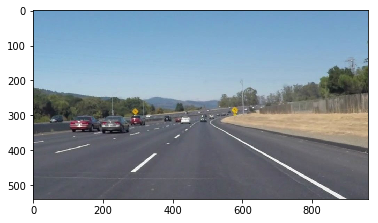

In [3]:
img = mpimg.imread('test.jpg')
plt.imshow(img)
print('This image is:', type(img), 'with dimensions:', img.shape)
img_copy_0 = np.copy(img)

### Test OpenCV

In [4]:
import cv2

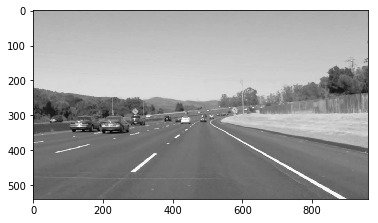

In [5]:
# convert the image to grayscale
gray = cv2.cvtColor(img_copy_0, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='Greys_r')

## Gauss + Canny Edges + Mask Area of Interest

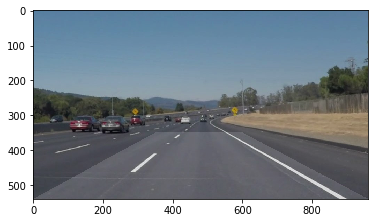

In [6]:
kernel_size=13
blur_gray=cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)

lower_treshold=50
higher_treshold=100


edges = cv2.Canny(blur_gray,lower_treshold,higher_treshold)
plt.imshow(edges,cmap='Greys_r')

#create a blank (white) copy with the same size
mask = np.zeros_like(edges)
ignore_mask_color = 255

#polygon
imshape = img_copy_0.shape
vertices = np.array([[(0,imshape[0]),(350, 350),(600,350),(imshape[1],imshape[0])]],dtype=np.int32)
cv2.fillPoly(mask, vertices,ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

color_mask = np.dstack((mask,mask,mask))

orig_w_polygon = cv2.addWeighted(img, 0.8, color_mask,0.1,0)
plt.imshow(orig_w_polygon)



## Hough Transform

(540, 960, 3)
(540, 960, 3)


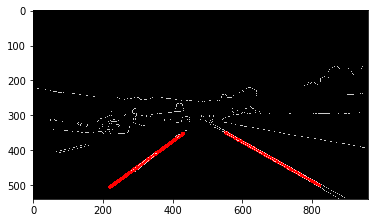

In [7]:
#Hough parameters

rho = 1
theta = np.pi/180
treshold = 1
min_line_length = 10
max_line_gap = 5

#create a blank (white) copy with the same size
line_image = np.copy(img_copy_0)*0
line_image_r = np.copy(img_copy_0)*0
line_image_l= np.copy(img_copy_0)*0
#Run Hough

lines = cv2. HoughLinesP(masked_edges, rho, theta, treshold, np.array([]), min_line_length, max_line_gap)


# Draw segments

#for segment in lines:
    #for x1,y1,x2,y2 in segment:
         #if (abs(y1-y2) > 10) and (y1-y2)< -3: 
             #cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
x_r=[]
y_r=[]
x_l=[]
y_l=[]
z_right=[]
z_left=[]
x1_new=[]
y1_new=[]
x2_new=[]
y2_new=[]
    
    
for segment in lines:
    for x1,y1,x2,y2 in segment:
            # ignoring the horizontal lines and separating left and right
        if (abs(y1-y2) > 10) and (y1-y2)<-3: 
            x_r+=[x1,x2]
            y_r+=[y1,y2]
        elif (abs(y1-y2) > 10) and (y1-y2)> 3:
            x_l+=[x1,x2]
            y_l+=[y1,y2]
            
            
#Right Lane Border
z_right=np.polyfit(x_r,y_r,1)
m_r,b_r=z_right
x1_r= 550
y1_r= int((x1_r) * m_r + b_r)
x2_r= 820
y2_r= int((x2_r) * m_r + b_r)
cv2.line(line_image_r,(x1_r,y1_r),(x2_r,y2_r),(255,0,0),10)

#Left Lane Border
z_left=np.polyfit(x_l,y_l,1)
m_l,b_l=z_left
x1_l= 220
y1_l= int((x1_l) * m_l + b_l)
x2_l= 430
y2_l= int((x2_l) * m_l + b_l)

cv2.line(line_image_l,(x1_l,y1_l),(x2_l,y2_l),(255,0,0),10)
            
line_image = cv2.addWeighted(line_image_l, 1, line_image_r,1,0)      
                     
                
# color_edges

color_edges = np.dstack((edges,edges,edges))

#Drw the lines on the line_image
print(color_edges.shape)
print(line_image.shape)

lines_edges = cv2.addWeighted(color_edges, 0.8, line_image,1,0)
plt.imshow(lines_edges)




## Original with Lanes


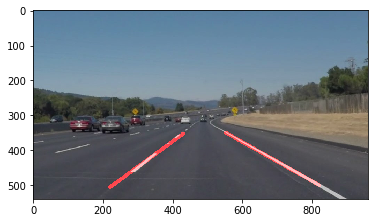

In [86]:
#Drw the lines on the original image

orig_w_lines = cv2.addWeighted(img, 0.8, line_image,1,0)
plt.imshow(orig_w_lines)